### Authors: Neil de la Fuente, Daniel Vidal, Joan Samper

# LAB3

## Exercise 1

In [1]:
import nltk
from nltk.corpus import webtext

# Download the webtext corpus
nltk.download('webtext')

# Download the tokenizer
nltk.download('punkt')

# Access the firefox.txt file
firefox_text = webtext.raw('firefox.txt')

firefox_tokens = nltk.word_tokenize(firefox_text)

[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### 2. Display the vocabulary size

In [2]:
vocab_size = len(set(firefox_tokens))
print(f"Vocabulary size: {vocab_size}")

Vocabulary size: 9300


### 3. Perform stemming on the text


• Using Porter stemmer:

In [3]:
from nltk import PorterStemmer

porter_stemmer = PorterStemmer()

firefox_porter_stem = [porter_stemmer.stem(token) for token in firefox_tokens]
firefox_porter_stem[:10]

['cooki', 'manag', ':', '``', 'do', "n't", 'allow', 'site', 'that', 'set']

• Using Snowball stemmer:

In [4]:
from nltk import SnowballStemmer

snowball_stemmmer = SnowballStemmer("english")
firefox_snowball_stem = [snowball_stemmmer.stem(token) for token in firefox_tokens]

firefox_snowball_stem[:10]

['cooki', 'manag', ':', '``', 'do', "n't", 'allow', 'site', 'that', 'set']

Bonus: Check for robustness of stemming for words that end in ing and should be stemmed to the root word.

In [5]:
king ="king"
#lets apply stemming to the word king
print(f"Stemming the word {king} using PorterStemmer gives us {porter_stemmer.stem(king)}")
print(f"Stemming the word {king} using SnowballStemmer gives us {snowball_stemmmer.stem(king)}")
print("\n")

#But lets see what happens when we apply stemming to the word "lying"
lying = "lying"
print(f"Stemming the word {lying} using PorterStemmer gives us {porter_stemmer.stem(lying)}")
print(f"Stemming the word {lying} using SnowballStemmer gives us {snowball_stemmmer.stem(lying)}")
print("\n")

#And with superking?
superking = "superking"
print(f"Stemming the word {superking} using PorterStemmer gives us {porter_stemmer.stem(superking)}")
print(f"Stemming the word {superking} using SnowballStemmer gives us {snowball_stemmmer.stem(superking)}")

Stemming the word king using PorterStemmer gives us king
Stemming the word king using SnowballStemmer gives us king


Stemming the word lying using PorterStemmer gives us lie
Stemming the word lying using SnowballStemmer gives us lie


Stemming the word superking using PorterStemmer gives us superk
Stemming the word superking using SnowballStemmer gives us superk


### 4. Display the vocabulary size after stemming


In [6]:
print(f"The vocabulary size after stemming with PorterStemmer is {len(set(firefox_porter_stem))}")
print("\n")
print(f"The vocabulary size after stemming with SnowballStemmer is {len(set(firefox_snowball_stem))}")

The vocabulary size after stemming with PorterStemmer is 5847


The vocabulary size after stemming with SnowballStemmer is 5702


### 5. Import the stop-words module, and list them

In [7]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
# List the English stopwords
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [9]:

FirefoxFiltered = [w for w in firefox_tokens if w not in stopwords]
print(f"The length of the firefox file after removing stopwords:{len(set(FirefoxFiltered))}")

The length of the firefox file after removing stopwords:9187


### 6. Remove the stop-words from the text

In [10]:
FirefoxFiltered = [w for w in firefox_tokens if w not in stopwords]
FirefoxFiltered[:10]

['Cookie',
 'Manager',
 ':',
 '``',
 'Do',
 "n't",
 'allow',
 'sites',
 'set',
 'removed']

And if we did this experiment after adding Snowball stemming we will get the following results:


In [11]:
Firefox_snowball_stemmed_filtered = [snowball_stemmmer.stem(token) for token in FirefoxFiltered]
Firefox_snowball_stemmed_filtered[:10]


['cooki', 'manag', ':', '``', 'do', "n't", 'allow', 'site', 'set', 'remov']

### 7. Display the vocabulary size

In [12]:
print(f"The length of the firefox file's vocabulary size after removing stopwords:{len(set(FirefoxFiltered))}")
print(f"The length of the firefox file's vocabulary size after removing stopwords and stemming:{len(set(Firefox_snowball_stemmed_filtered))}")

The length of the firefox file's vocabulary size after removing stopwords:9187
The length of the firefox file's vocabulary size after removing stopwords and stemming:5669


### 8. Create your own stop-word, append to the stop-words list, and apply it


In [13]:
# Define your custom stopwords
custom_stop_words = {'example', 'with', 'is'}

# Combine NLTK stopwords with your custom stopwords
all_stop_words = stopwords.union(custom_stop_words)

# Example text
text = "This is an example sentence with random words."

# Tokenize the text
words = nltk.word_tokenize(text)

# Filter the text by removing stopwords
filtered_text = [word for word in words if word.lower() not in all_stop_words]

print("Original text:", text)
print("Filtered text:", ' '.join(filtered_text))

Original text: This is an example sentence with random words.
Filtered text: sentence random words .


### 9. Calculate the frequency distribution of words, and show them using a wordcloud

In [14]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

fdist = FreqDist(word.lower() for word in firefox_tokens)
fdist

FreqDist({'in': 2203, 'to': 2138, 'the': 1903, 'not': 1727, 'when': 1387, "''": 1330, 'on': 1210, 'a': 1190, 'does': 1064, 'is': 1044, ...})

In [15]:
fdist_stpw = FreqDist(word.lower() for word in FirefoxFiltered)
fdist_stpw

FreqDist({"''": 1330, '.': 1013, "n't": 944, '``': 919, '(': 878, 'page': 866, 'firefox': 849, ')': 799, ':': 676, 'window': 611, ...})

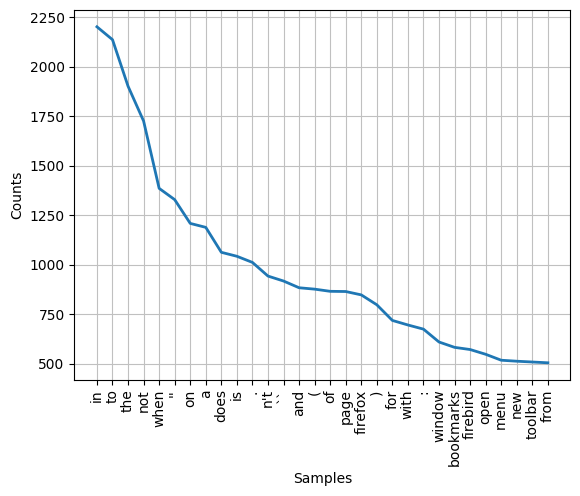

In [16]:
#Plot the frequency distribution of the words
import matplotlib.pyplot as plt
fdist.plot(30, cumulative=False)
plt.show()


#### Plot the wordCloud

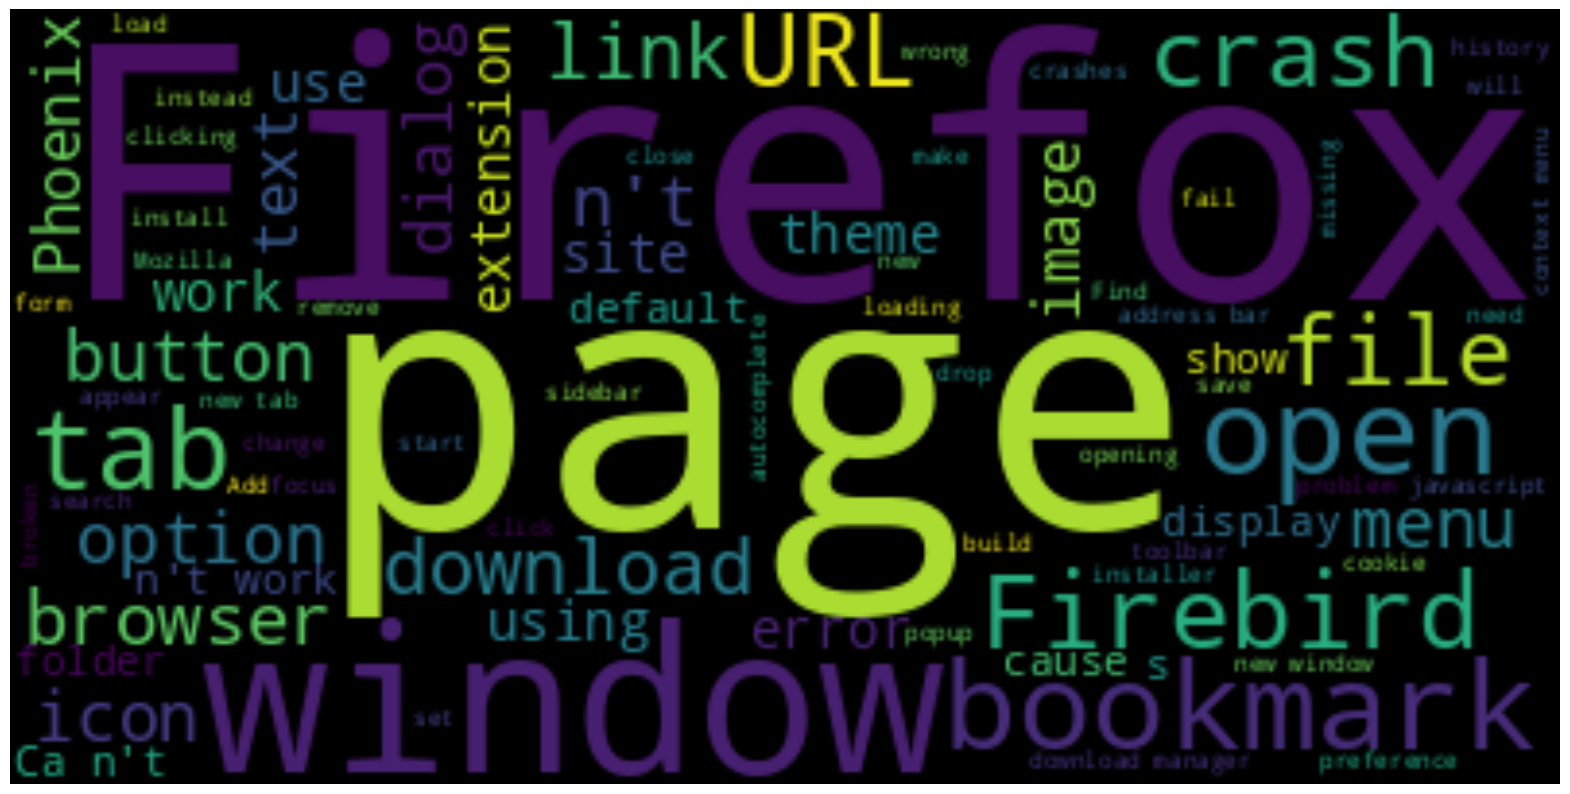

In [17]:
#Display the wordcloud
from wordcloud import WordCloud

# Convert the set of tokens into a single string
text = ' '.join(firefox_tokens)

# Generate the word cloud
wordcloud = WordCloud().generate(text)

# Display the word cloud
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## Exercise 2

### 1. Import auxiliary functions, and open The Treebank Corpus

In [18]:
from nltk.corpus import treebank

# Auxiliary functions:

# Define the ufeatures() class
def ufeatures(utt, idx):
    """
    Description: This function returns a dictionary with the following features for the word at position idx in the utterance utt:
        - word: the word at position idx
        - dist_from_first: the distance of the word from the first word in the utterance
        - dist_from_last: the distance of the word from the last word in the utterance
        - capitalized: whether the word is capitalized
        - prefix1: the first letter of the word
        - prefix2: the first two letters of the word
        - prefix3: the first three letters of the word
        - suffix1: the last letter of the word
        - suffix2: the last two letters of the word
        - suffix3: the last three letters of the word
        - prev_word: the word before the word at position idx
        - next_word: the word after the word at position idx
        - numeric: whether the word is numeric

    Arguments:
        - utt: the utterance (list of words)
        - idx: the position of the word in the utterance
    """
    ftdist = {}
    ftdist['word'] = utt[idx]
    ftdist['dist_from_first'] = idx - 0
    ftdist['dist_from_last'] = len(utt) - idx
    ftdist['capitalized'] = utt[idx][0].upper() == utt[idx][0]
    ftdist['prefix1'] = utt[idx][0]
    ftdist['prefix2'] = utt[idx][:2]
    ftdist['prefix3'] = utt[idx][:3]
    ftdist['suffix1'] = utt[idx][-1]
    ftdist['suffix2'] = utt[idx][-2:]
    ftdist['suffix3'] = utt[idx][-3:]
    ftdist['prev_word'] = '' if idx==0 else utt[idx-1]
    ftdist['next_word'] = '' if idx==(len(utt)-1) else utt[idx+1]
    ftdist['numeric'] = utt[idx].isdigit()
    return ftdist

# Download the Treebank Corpus (if not already done)
nltk.download('treebank')

# Access sentences from the Treebank Corpus
sentences = treebank.sents()

# Example: print the first sentence
print(sentences[0])

# Access parsed sentences
parsed_sentences = treebank.parsed_sents()

# Example: print the parse tree of the first sentence
print('\n', parsed_sentences[0])

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']

 (S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))


### 2. Extract the features using the function ufeatures

In [19]:
# Extracted features using the ufeatures() function
features = [ufeatures(sent, index) for sent in sentences for index in range(len(sent))]
features[:10]

[{'word': 'Pierre',
  'dist_from_first': 0,
  'dist_from_last': 18,
  'capitalized': True,
  'prefix1': 'P',
  'prefix2': 'Pi',
  'prefix3': 'Pie',
  'suffix1': 'e',
  'suffix2': 're',
  'suffix3': 'rre',
  'prev_word': '',
  'next_word': 'Vinken',
  'numeric': False},
 {'word': 'Vinken',
  'dist_from_first': 1,
  'dist_from_last': 17,
  'capitalized': True,
  'prefix1': 'V',
  'prefix2': 'Vi',
  'prefix3': 'Vin',
  'suffix1': 'n',
  'suffix2': 'en',
  'suffix3': 'ken',
  'prev_word': 'Pierre',
  'next_word': ',',
  'numeric': False},
 {'word': ',',
  'dist_from_first': 2,
  'dist_from_last': 16,
  'capitalized': True,
  'prefix1': ',',
  'prefix2': ',',
  'prefix3': ',',
  'suffix1': ',',
  'suffix2': ',',
  'suffix3': ',',
  'prev_word': 'Vinken',
  'next_word': '61',
  'numeric': False},
 {'word': '61',
  'dist_from_first': 3,
  'dist_from_last': 15,
  'capitalized': True,
  'prefix1': '6',
  'prefix2': '61',
  'prefix3': '61',
  'suffix1': '1',
  'suffix2': '61',
  'suffix3': '61',

Then features is a list of dictionaries, where each dictionary contains the features for a word in the corpus.
We will use this list to train a classifier that will predict the part-of-speech tag of a word based on its features.

### 3. Use the tagged sentences (universal tag set) for the ground-truth

In [20]:
# Extract the words
words = [word for sent in treebank.tagged_sents() for (word, pos) in sent]
print(f"The first 10 words are:\n {words[:10]}")

# Extract the part-of-speech tags
pos_tags = [pos for sent in treebank.tagged_sents() for (word, pos) in sent]
print("The first 10 part-of-speech tags are:\n", pos_tags[:10])

# Extract the features using the ufeatures() function
features = [ufeatures(words, index) for index in range(len(words))]
print(f"The features of the first 10 words are:\n {features[:10]}")

# Now we can combine the features with the part-of-speech tags to create a dataset that will be used to train a classifier


The first 10 words are:
 ['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the']
The first 10 part-of-speech tags are:
 ['NNP', 'NNP', ',', 'CD', 'NNS', 'JJ', ',', 'MD', 'VB', 'DT']
The features of the first 10 words are:
 [{'word': 'Pierre', 'dist_from_first': 0, 'dist_from_last': 100676, 'capitalized': True, 'prefix1': 'P', 'prefix2': 'Pi', 'prefix3': 'Pie', 'suffix1': 'e', 'suffix2': 're', 'suffix3': 'rre', 'prev_word': '', 'next_word': 'Vinken', 'numeric': False}, {'word': 'Vinken', 'dist_from_first': 1, 'dist_from_last': 100675, 'capitalized': True, 'prefix1': 'V', 'prefix2': 'Vi', 'prefix3': 'Vin', 'suffix1': 'n', 'suffix2': 'en', 'suffix3': 'ken', 'prev_word': 'Pierre', 'next_word': ',', 'numeric': False}, {'word': ',', 'dist_from_first': 2, 'dist_from_last': 100674, 'capitalized': True, 'prefix1': ',', 'prefix2': ',', 'prefix3': ',', 'suffix1': ',', 'suffix2': ',', 'suffix3': ',', 'prev_word': 'Vinken', 'next_word': '61', 'numeric': False}, {'word': '61', 'd

### 4. Split the corpus into train and test subsets

In [21]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Convert the features into a matrix
vec = DictVectorizer()
X = vec.fit_transform(features)
# Convert the part-of-speech tags into a matrix
encoder = LabelEncoder()
y = encoder.fit_transform(pos_tags)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


### 5. Create a Random Forest classifier, and fit it using the train subset

In [22]:
# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

### 6. Predict the tags of the test subset

In [23]:

# Make predictions
y_pred = clf.predict(X_test)

#Print some of the predictions
print("The first 10 predictions are:", y_pred[:10].T)
print("The first 10 actual part-of-speech tags are:", y_test[:10].T)

# But this are just numbers, let's see the actual part-of-speech tags
print("The first 10 actual part-of-speech tags are:", encoder.inverse_transform(y_test[:10]).T)
print("The first 10 predictions are:", encoder.inverse_transform(y_pred[:10]).T)


The first 10 predictions are: [40 20 11 14 40 11 33 11 15  9]
The first 10 actual part-of-speech tags are: [40 20 11 14 40 11 33 11 15  9]
The first 10 actual part-of-speech tags are: ['VBZ' 'NN' 'DT' 'IN' 'VBZ' 'DT' 'TO' 'DT' 'JJ' 'CC']
The first 10 predictions are: ['VBZ' 'NN' 'DT' 'IN' 'VBZ' 'DT' 'TO' 'DT' 'JJ' 'CC']


### 7. Calculate the performance of the POS tagger

In [25]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.94


In [29]:
from sklearn.metrics import f1_score

print("The F1 score is:",round(f1_score(y_test, y_pred, average = 'micro'), 3))

The F1 score is: 0.942


### 8- Show the top features of the model

In [26]:
#To show the top features of the classifier we can use the decision tree's feature_importances_ attribute
importances = clf.feature_importances_ # This returns the feature importance value for each feature
#But we want to see which indices correspond to the most important features
indices = importances.argsort()[::-1] # This sorts the indices of the features by their importance
print("The top 10 most important features are:", [vec.feature_names_[index] for index in indices[:10]])

The top 10 most important features are: ['prefix1=*', 'suffix2=,', 'capitalized', 'suffix1=s', 'suffix2=.', 'word=the', 'word=to', 'prefix2=a', 'prefix3=of', 'word=and']
